# This sorts the rideshare data into zip codes of origin and destination

In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

C:\Users\Diarra\anaconda3\envs\geospatial\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
#reads in zipcode boundary geojson file
zipcodes = gpd.read_file('data/Chicago/Boundaries - ZIP Codes.geojson') 
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,objectid,shape_area,shape_len,zip,geometry
0,33,106052287.488,42720.0444058,60647,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,127476050.762,48103.7827213,60639,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,45069038.4783,27288.6096123,60707,"MULTIPOLYGON (((-87.78500 41.90915, -87.78531 ..."
3,36,70853834.3797,42527.9896789,60622,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,99039621.2518,47970.1401531,60651,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."


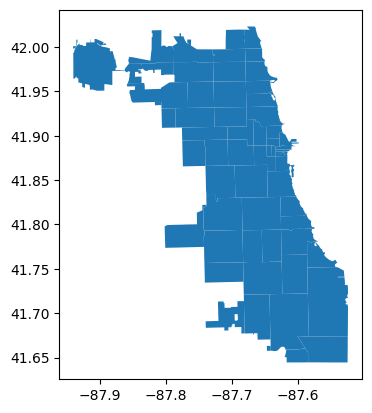

In [3]:
zipcodes.plot();

In [4]:
#drops unneeded zipcode columns
zipcodes = zipcodes[['zip', 'geometry']]

In [5]:
#reads in rideshare data
rs_from = pd.read_csv('data/Chicago/cleaned/rideshare/rs_clean_M6.csv')
print(rs_from.shape)
rs_from.head(3)

(4403740, 21)


,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,7bfe1231590ba8c2503a6663f4fbd5013c1b1883,06/01/2022 12:00:00 AM,06/01/2022 12:45:00 AM,2143,17.3,1.703198e+10,NaN,76.0,NaN,52.5,...,13.13,65.63,False,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
1,001362576085b34fe15a11f4753a92c676b7761b,06/01/2022 12:00:00 AM,06/01/2022 01:15:00 AM,4395,24.5,NaN,NaN,NaN,69.0,42.5,...,1.28,43.78,False,1,NaN,NaN,NaN,41.763247,-87.616134,POINT (-87.6161341112 41.7632467988)
2,005bd676ded62046d8899d092e6467b164188bc4,06/01/2022 12:00:00 AM,06/01/2022 12:15:00 AM,789,6.7,NaN,NaN,32.0,29.0,15.0,...,1.28,16.28,False,1,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.860190,-87.717220,POINT (-87.7172201 41.8601900192)


In [6]:
#renames columns
rs_from = rs_from.rename(columns={"Pickup Centroid Latitude": "lat", "Pickup Centroid Longitude": "lng"})
rs_from

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,lat,lng,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,7bfe1231590ba8c2503a6663f4fbd5013c1b1883,06/01/2022 12:00:00 AM,06/01/2022 12:45:00 AM,2143,17.3,1.703198e+10,NaN,76.0,NaN,52.5,...,13.13,65.63,False,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
1,001362576085b34fe15a11f4753a92c676b7761b,06/01/2022 12:00:00 AM,06/01/2022 01:15:00 AM,4395,24.5,NaN,NaN,NaN,69.0,42.5,...,1.28,43.78,False,1,NaN,NaN,NaN,41.763247,-87.616134,POINT (-87.6161341112 41.7632467988)
2,005bd676ded62046d8899d092e6467b164188bc4,06/01/2022 12:00:00 AM,06/01/2022 12:15:00 AM,789,6.7,NaN,NaN,32.0,29.0,15.0,...,1.28,16.28,False,1,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.860190,-87.717220,POINT (-87.7172201 41.8601900192)
3,00baa813746e0ee475a74def5316c4e95a559f65,06/01/2022 12:00:00 AM,06/01/2022 12:15:00 AM,932,5.2,NaN,NaN,49.0,NaN,12.5,...,1.28,13.78,False,1,41.706588,-87.623367,POINT (-87.6233665115 41.7065878819),NaN,NaN,NaN
4,010703a8302593bbfaebaf2ee8e683516c709609,06/01/2022 12:00:00 AM,06/01/2022 12:45:00 AM,2000,14.4,1.703198e+10,1.703103e+10,76.0,3.0,40.0,...,11.01,51.01,False,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.958155,-87.653022,POINT (-87.6530217894 41.9581548757)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403735,ff714128bfce507b06f87bd69749b7c0025a7b2f,06/30/2022 11:45:00 PM,07/01/2022 12:00:00 AM,669,2.2,NaN,NaN,8.0,24.0,12.5,...,1.28,13.78,False,1,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
4403736,ff863059aa05f0901373112a6e83167e90e6cea2,06/30/2022 11:45:00 PM,07/01/2022 01:15:00 AM,4914,34.4,NaN,NaN,NaN,44.0,32.5,...,13.37,52.87,False,1,NaN,NaN,NaN,41.740206,-87.615970,POINT (-87.6159695226 41.7402057565)
4403737,ffc6ea2d11bbefbb4a7961934c096d5b743d8471,06/30/2022 11:45:00 PM,07/01/2022 12:00:00 AM,487,2.4,NaN,NaN,40.0,41.0,12.5,...,1.28,13.78,False,1,41.792357,-87.617931,POINT (-87.6179313803 41.7923572233),41.794090,-87.592311,POINT (-87.592310855 41.794090253)
4403738,ffe298ba0588243e119ff73d9f07a0e16f577131,06/30/2022 11:45:00 PM,07/01/2022 12:00:00 AM,789,5.1,1.703106e+10,1.703108e+10,6.0,8.0,30.0,...,3.70,33.70,False,1,41.942692,-87.651771,POINT (-87.6517705068 41.9426918444),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259)


In [7]:
#creates column containing geopoints
rs_from['from_geo'] = rs_from.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
rs_from.head(3)

C:\Users\Diarra\anaconda3\envs\geospatial\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Trip Total,Shared Trip Authorized,Trips Pooled,lat,lng,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,from_geo
0,7bfe1231590ba8c2503a6663f4fbd5013c1b1883,06/01/2022 12:00:00 AM,06/01/2022 12:45:00 AM,2143,17.3,1.703198e+10,NaN,76.0,NaN,52.5,...,65.63,False,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN,POINT (-87.9030396611 41.9790708201)
1,001362576085b34fe15a11f4753a92c676b7761b,06/01/2022 12:00:00 AM,06/01/2022 01:15:00 AM,4395,24.5,NaN,NaN,NaN,69.0,42.5,...,43.78,False,1,NaN,NaN,NaN,41.763247,-87.616134,POINT (-87.6161341112 41.7632467988),POINT (nan nan)
2,005bd676ded62046d8899d092e6467b164188bc4,06/01/2022 12:00:00 AM,06/01/2022 12:15:00 AM,789,6.7,NaN,NaN,32.0,29.0,15.0,...,16.28,False,1,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.860190,-87.717220,POINT (-87.7172201 41.8601900192),POINT (-87.6251921424 41.8788655841)


In [8]:
#drops unneeded columns
rs_from_geo = rs_from[['Trip ID', 'from_geo']]
rs_from_geo

,Trip ID,from_geo
0,7bfe1231590ba8c2503a6663f4fbd5013c1b1883,POINT (-87.9030396611 41.9790708201)
1,001362576085b34fe15a11f4753a92c676b7761b,POINT (nan nan)
2,005bd676ded62046d8899d092e6467b164188bc4,POINT (-87.6251921424 41.8788655841)
3,00baa813746e0ee475a74def5316c4e95a559f65,POINT (-87.6233665115 41.7065878819)
4,010703a8302593bbfaebaf2ee8e683516c709609,POINT (-87.9030396611 41.9790708201)
...,...,...
4403735,ff714128bfce507b06f87bd69749b7c0025a7b2f,POINT (-87.6333080367 41.899602111)
4403736,ff863059aa05f0901373112a6e83167e90e6cea2,POINT (nan nan)
4403737,ffc6ea2d11bbefbb4a7961934c096d5b743d8471,POINT (-87.61793138030001 41.7923572233)
4403738,ffe298ba0588243e119ff73d9f07a0e16f577131,POINT (-87.65177050680001 41.9426918444)


In [9]:
#creates geodataframe from rideshare info
rs_from_geo = gpd.GeoDataFrame(rs_from_geo, 
                           crs = zipcodes.crs, 
                           geometry = rs_from['from_geo'])

In [10]:
#sorts origin taxi info into zipcodes
from_by_zip = gpd.sjoin(rs_from_geo, zipcodes, op = 'within')
from_by_zip = from_by_zip.rename(columns={"Trip ID": "trip_id", 'geometry': 'zip_geo', "zip": "from_zip"})
from_by_zip.head()

C:\Users\Diarra\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,trip_id,from_geo,zip_geo,index_right,from_zip
0,7bfe1231590ba8c2503a6663f4fbd5013c1b1883,POINT (-87.9030396611 41.9790708201),POINT (-87.90304 41.97907),37,60666
4,010703a8302593bbfaebaf2ee8e683516c709609,POINT (-87.9030396611 41.9790708201),POINT (-87.90304 41.97907),37,60666
19,078365cca7a3c8cadd264ce6289651426aaf622f,POINT (-87.9030396611 41.9790708201),POINT (-87.90304 41.97907),37,60666
25,09bcdc4160bf964ed30a34c773aaf69a3f64418f,POINT (-87.9030396611 41.9790708201),POINT (-87.90304 41.97907),37,60666
31,0baa93fea3b215ca2edaa6a6d9b1586a23acbe54,POINT (-87.9030396611 41.9790708201),POINT (-87.90304 41.97907),37,60666


In [11]:
from_by_zip.from_zip.value_counts()

60666    293729
60657    216161
60611    208785
60614    202544
60607    192947
60610    172356
60616    168837
60622    160913
60647    131198
60618    124365
60654    111254
60638     94479
60640     89978
60603     87096
60637     81263
60608     80748
60613     78507
60604     74240
60642     68186
60601     67726
60625     65407
60661     62915
60619     59990
60623     56988
60644     55693
60628     50201
60612     50024
60605     49926
60626     49215
60660     48846
60639     45060
60629     44334
60649     40750
60632     38299
60615     38029
60641     37661
60651     37165
60620     36013
60609     34949
60617     32514
60653     31315
60643     31242
60645     30968
60631     25331
60630     21311
60621     21305
60634     18248
60636     17639
60624     17423
60652     16029
60659     15867
60646      9290
60707      7697
60655      3837
60656      2484
60633      2376
60827       482
Name: from_zip, dtype: int64

### The following repeats the same process for destination data

In [12]:
rs_to = pd.read_csv('data/Chicago/cleaned/rideshare/rs_clean_M6.csv')
print(rs_to.shape)
rs_to.head(3)

(4403740, 21)


,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,7bfe1231590ba8c2503a6663f4fbd5013c1b1883,06/01/2022 12:00:00 AM,06/01/2022 12:45:00 AM,2143,17.3,1.703198e+10,NaN,76.0,NaN,52.5,...,13.13,65.63,False,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
1,001362576085b34fe15a11f4753a92c676b7761b,06/01/2022 12:00:00 AM,06/01/2022 01:15:00 AM,4395,24.5,NaN,NaN,NaN,69.0,42.5,...,1.28,43.78,False,1,NaN,NaN,NaN,41.763247,-87.616134,POINT (-87.6161341112 41.7632467988)
2,005bd676ded62046d8899d092e6467b164188bc4,06/01/2022 12:00:00 AM,06/01/2022 12:15:00 AM,789,6.7,NaN,NaN,32.0,29.0,15.0,...,1.28,16.28,False,1,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.860190,-87.717220,POINT (-87.7172201 41.8601900192)


In [13]:
rs_to = rs_to.rename(columns={"Dropoff Centroid Latitude": "lat", "Dropoff Centroid Longitude": "lng"})

In [14]:
rs_to['to_geo'] = rs_to.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)

C:\Users\Diarra\anaconda3\envs\geospatial\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [15]:
rs_to_geo = rs_to[['Trip ID', 'to_geo']]

In [16]:
rs_to_geo = gpd.GeoDataFrame(rs_to_geo, 
                           crs = zipcodes.crs, 
                           geometry = rs_to['to_geo'])

In [17]:
to_by_zip = gpd.sjoin(rs_to_geo, zipcodes, op = 'within')
to_by_zip = to_by_zip.rename(columns={"Trip ID": "trip_id", 'geometry': 'zip_geo', "zip": "to_zip"})
to_by_zip.head()

C:\Users\Diarra\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,trip_id,to_geo,zip_geo,index_right,to_zip
1,001362576085b34fe15a11f4753a92c676b7761b,POINT (-87.6161341112 41.7632467988),POINT (-87.61613 41.76325),60,60619
15,06d7b456e00b70629ff05d2d81735019703bb970,POINT (-87.6159695226 41.7402057565),POINT (-87.61597 41.74021),60,60619
58,141642da9b919153e0df8d0b5138dfc52f3d91f4,POINT (-87.6159695226 41.7402057565),POINT (-87.61597 41.74021),60,60619
80,1cfc7e1d37430970a17f21bb794e7c731e029ebb,POINT (-87.6161341112 41.7632467988),POINT (-87.61613 41.76325),60,60619
97,22f20baba4497539b9bd33c51a5c2cdad41b6cf6,POINT (-87.6159695226 41.7402057565),POINT (-87.61597 41.74021),60,60619


### Next, the origin and destination datasets will be merged and filtered for trips between different zip codes

In [18]:
trips_by_zip = from_by_zip.merge(to_by_zip, left_on='trip_id', right_on='trip_id')

In [19]:
trips_by_zip = trips_by_zip[['trip_id', 'from_zip', 'to_zip']]
trips_by_zip

,trip_id,from_zip,to_zip
0,010703a8302593bbfaebaf2ee8e683516c709609,60666,60613
1,078365cca7a3c8cadd264ce6289651426aaf622f,60666,60601
2,0baa93fea3b215ca2edaa6a6d9b1586a23acbe54,60666,60622
3,1af27725ae3719dc25c12f6afaca4895173e3a77,60666,60618
4,236e01e7b6aa28442d8f86e62dca8dfe01a74a1a,60666,60610
...,...,...,...
3411109,673a1269bc428c664c88085adc5ea5c324e28f1d,60707,60612
3411110,22fddaeb627837b2a611efb8c6c6e7e47e4be5e0,60707,60654
3411111,9b9bd61166bef3640e71970bd8a228914e859fa0,60707,60656
3411112,7a64a7dc5e726249fd429ecd7d9cbe6eeabe1dd9,60707,60646


In [20]:
#displays how many trips stay in the same zipcode
trips_by_zip.loc[trips_by_zip.from_zip == trips_by_zip.to_zip] 

,trip_id,from_zip,to_zip
39,cf9cb6cc45318ce1e7ddcf479ff2767d8ed45a0a,60666,60666
60,23bb690178bcca0a152e6acb5a5f79593a7fc587,60666,60666
79,c258563f3c001162461cc3fdf570368f833d75fa,60666,60666
122,4e66d7254dee5bf893e6f9062bdfe0e6d46181e6,60666,60666
131,9471d2928df7e53cc3ce18b070061b9b8da47e90,60666,60666
...,...,...,...
3410986,276b9ff5eb5eeccea3226f74d81648545655431c,60827,60827
3411042,f8e699b09ba08f44d4cf72a4cbec8b1675d15978,60827,60827
3411046,ef680c25f3b13f7b9d78825f79c4ab89fbd7cbb6,60827,60827
3411049,69300e341daf4d5610e17065b4c424ac8a63e1ec,60827,60827


In [21]:
#save the trips that are between zip codes
diff = trips_by_zip.loc[trips_by_zip.from_zip != trips_by_zip.to_zip] 

In [22]:
#counts the number of trips between each pair of zip codes
trip_count = diff[['from_zip', 'to_zip']].value_counts().reset_index(name='count')

In [23]:
trip_count['from_zip'] = trip_count.from_zip.astype(str)
trip_count['to_zip'] = trip_count.to_zip.astype(str)

In [24]:
trip_count.to_csv('data/Chicago/cleaned/rideshare/rs_count_m6.csv', index=False)